<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #7: Ranking

<span style="color:blue; font-size: 12pt">Anastasia Zukhba </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:

[1] C.J.C. Burges, T. Shaked, E. Renshaw, A. Lazier, M. Deeds, N. Hamilton and G. Hullender. Learning to rank using gradient descent. In Proc. of ICML, pages 89-96, 2005.

[2] Y. Freund, R. Iyer, R. Schapire, and Y. Singer. An efficient boosting algorithm for combining preferences. The Journal of Machine Learning Research, 4: 933-969, 2003.

[3] J. Xu and H. Li. AdaRank: a boosting algorithm for information retrieval. In Proc. of SIGIR, pages 391-398, 2007.

[4] D. Metzler and W.B. Croft. Linear feature-based models for information retrieval. Information Retrieval, 10(3): 257-274, 2007.

[5] Q. Wu, C.J.C. Burges, K. Svore and J. Gao. Adapting Boosting for Information Retrieval Measures. Journal of Information Retrieval, 2007.

[6] J.H. Friedman. Greedy function approximation: A gradient boosting machine. Technical Report, IMS Reitz Lecture, Stanford, 1999; see also Annals of Statistics, 2001.

[7] Z. Cao, T. Qin, T.Y. Liu, M. Tsai and H. Li. Learning to Rank: From Pairwise Approach to Listwise Approach. ICML 2007. 

[8] L. Breiman. Random Forests. Machine Learning 45 (1): 5–32, 2001.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было.

<h1 align="center">Check Questions (10%)</h1> 

**1.** Что является объектом в задаче обучения ранжированию? Какой смысл имеют целевые метки? Какие объекты сравнимы между собой?

Объекты == (запрос, документ)
Целевые метрики имеют смысл величин, значение которых отражает насколько релевантно система ранжирования упорядочивает документы. Максимизируя/минимизируя их мы получим качественный алгоритм ранжирования.
Между собой сравнимы документы найденые по одному и тому же запросу.

**2.** В чём преимущество метрики NDCG перед метрикой MAP?

Чем более релевантный документ тем болше его вклад в метрику NDCG(в MAP только рел/не рел) + чем позже расположен релевантный документ в выдаче тем значительно меньший вклад он вносит(экспоненциальное затухание).

**3.** Почему говорят, что все основные метрики качества дискретны?

Потому что они рассчитываются с учетом n - количество первых документов в выдаче, по которым считаем значение.

**4.** В чем преимущество факторизации в модели RankNet?

<Ответ>

**5.** Как решается проблема дискретности метрик в моделях LambdaRank и LambdaMART?

По сути в этих моделях используется градиентный спуск для гладкой функции потерь(логорифмичекой) только шаг градиентного спуска при обновлении весов домножается на изменение значения функционала при перестановке пар объектов.

**6.** Какое преобразование данных используется в модели RankSVM?

Максимизирум зазор, используя функцию потерь $(1-M)_{+}$

**7.** Как изменится верхняя оценка на скорость сходимости в модели PageRank, если считать, что при операции телепортации пользователь всегда выбирает страницу, отличную от текущей?

<Ответ>

**8.** Имеет ли смысл выполнять итерации в методе power iteration для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории? А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

С точки зрения теории в верхней оценке скорости сходимости, полученной из эргодической теоремы, скорость сходимости тем больше чем больше наименьшее значение в матрице переходных вероятностей(т.е. лучше всего ее заполнять значениями 1/количество элементов в строке).

<h1 align="center"> Theoretical tasks (10%)</h1>

**1.** Предположим, что известные вероятностности в модели RankNet задаются по правилу
$$Q_{ij} = \mathsf{Q}(X_i \triangleright X_j) = \frac{1}{1 + e^{-\sigma (Y_i - Y_j)}}.$$
Можно ли провести факторизацию в данной модели?

<Решение>

**2.** Покажите, что вес PageRank каждой страницы не меньше $\frac{p}{|V|}$.

<Решение>

**3.** Пользователь браузера в дополнение к кликам по ссылкам один раз может перейти по кнопке *Назад* и вернуться на предыдущую страницу. Можно ли такую модель описать с помощью однородной марковской цепи? Если да, опишите, если нет, докажите.

<Решение>

<h1 align="center"> Practical tasks (80%)</h1>
# Part 1 (15%)

In [1]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('text.latex', unicode=True)
plt.rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble='\\usepackage[russian]{babel}')
plt.rc('font', family='serif', size='16')

## Вычисление весов PageRank power-методом.

Реализовать удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

**Внимание!** Эти функции будут проверяться автоматическими тестами.

In [2]:
def create_page_rank_markov_chain(links, damping_factor=0.15, N=None):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        N --- число веб-страниц;
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links)
    if N is None:
        N = links.max() + 1
    
    prob_matrix = np.matrix(np.zeros((N, N)))
    for link in links:
        prob_matrix[link[0], link[1]] += 1
    prob_matrix = prob_matrix / prob_matrix.sum(axis=0)

    return np.nan_to_num(prob_matrix, copy=False)


def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor)
    distribution = start_distribution.ravel()
    distribution = distribution / distribution.sum() # make distribution sum to 1
    alpha = 1.*(1. - damping_factor)/prob_matrix.shape[0]
    M_hat = np.array(prob_matrix * damping_factor + alpha)
#     M_hat = (damping_factor)*prob_matrix + (1-damping_factor)*np.ones(prob_matrix.shape)/prob_matrix.shape[0]
    trace = []
    while True:
        distribution_old = distribution
        trace.append(distribution_old)
#         distribution = distribution.dot(M_hat)
        distribution = M_hat.dot(distribution)
        if np.sqrt((distribution - distribution_old).dot(
            np.transpose(distribution - distribution_old))) < tolerance:
            break
    
    if return_trace:
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()

# Проверка реализации
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [3]:
def random_graph(n, p):
    return np.array([(i, j) for i in range(n) for j in range(n) if np.random.binomial(1, p) == 1])

Теперь сгенерируем случайный граф и нарисуем его.

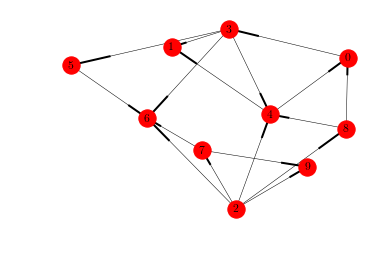

In [11]:
N, p = 10, 0.2
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

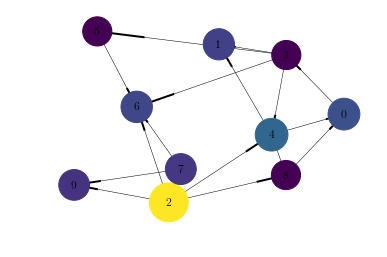

In [12]:
start_distribution = np.ones((1, N)) / N
pr_distribution, trace = page_rank(edges, start_distribution, return_trace=True)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

In [13]:
pr_distribution

array([ 0.10099905,  0.085     ,  0.15096792,  0.10666034,  0.09894993,
        0.09533784,  0.085     ,  0.0945625 ,  0.09752243,  0.085     ])

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

In [ ]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, <верхняя оценка скорости сходимости из эргодической теоремы>, 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

<Выводы>

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

<Исследования и выводы>

# Part 2 (15%)

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [14]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [15]:
from tqdm import tqdm

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000). Таким сайтом может быть, например, сайт <a href=http://yandexdataschool.ru>Школы анализа данных</a>, сайт магазина, больницы. Однако, советуем не выбирать сайты типа kremlin.ru, мало ли что.

In [16]:
urls = ['https://yandexdataschool.ru/']
site = get_site(urls[0])
links = []

N = 1000
for i in tqdm(range(N)):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in tqdm(range(len(links_from_url))):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

  1%|          | 11/1000 [00:29<34:23,  2.09s/it]s]

<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>



  2%|▏         | 21/1000 [00:53<27:33,  1.69s/it]]

HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found


  2%|▏         | 22/1000 [01:03<1:08:16,  4.19s/it]

HTTP Error 404: Not Found



  4%|▍         | 43/1000 [02:16<30:53,  1.94s/it]s]

<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>
<urlopen error unknown url type: mailto>



100%|██████████| 1000/1000 [04:30<00:00,  3.70it/s]


Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

In [17]:
NN = 91

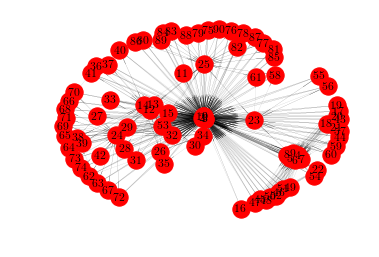

In [18]:
G = networkx.DiGraph()
G.add_edges_from(links)
plt.axis('off')
networkx.draw_networkx(G, width=0.05)

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

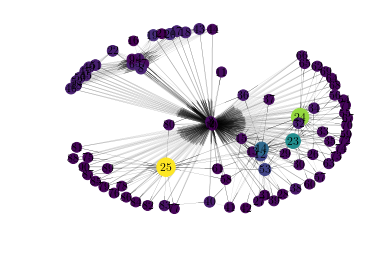

In [19]:
start_distribution = np.ones((1, NN)) / NN
pr_distribution, trace = page_rank(links, start_distribution, return_trace=True)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.05, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

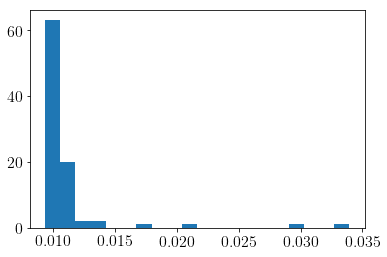

In [20]:
plt.hist(pr_distribution, bins=20)
plt.show()

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

In [21]:
def get_indexes_top_pages(distribution, n_top):
    return np.array(sorted([(w, i) for i, w in enumerate(distribution)], reverse=True)[:n_top], dtype=int)[:, 1]

def get_graph_with_chosen_pages(links, pages):
    return list(filter(lambda pair: pair[0] in pages and pair[1] in pages, links))

In [22]:
n_top = 20
top_indexes = get_indexes_top_pages(pr_distribution, n_top)

In [23]:
_ = list(map(lambda pair: print("{0} : {1}".format(*pair)), zip(top_indexes, np.array(urls)[top_indexes])))

25 : https://yandexdataschool.ru/edu-process/program/special-courses
24 : https://yandexdataschool.ru/edu-process/program/big-data
23 : https://yandexdataschool.ru/edu-process/program/data-analysis
14 : https://yandexdataschool.ru/edu-process/courses
53 : https://yandexdataschool.ru/edu-process/program/computer-science
12 : https://yandexdataschool.ru/edu-process/program
20 : https://yandexdataschool.ru/about/branches/saint-petersburg
19 : https://yandexdataschool.ru/about/branches/novosibirsk
18 : https://yandexdataschool.ru/about/branches/nizhny_novgorod
17 : https://yandexdataschool.ru/about/branches/minsk
8 : https://yandexdataschool.ru/about/graduates
43 : https://yandexdataschool.ru/about/branches/yekaterinburg
6 : https://yandexdataschool.ru/about/branches
52 : https://yandexdataschool.ru/about/graduates/yearbook/2016
51 : https://yandexdataschool.ru/about/graduates/yearbook/2015
50 : https://yandexdataschool.ru/about/graduates/yearbook/2014
49 : https://yandexdataschool.ru/abou

Выделяются подгруппы страниц посвященные выпускникам шад, образовательной программе и подразделениям. Важней всего на сайте шада донести инфу о процессе обучения, поэтому больше всего ссылок ведут на разделы, связанные с обучением.

In [24]:
subgraph = get_graph_with_chosen_pages(links, top_indexes)

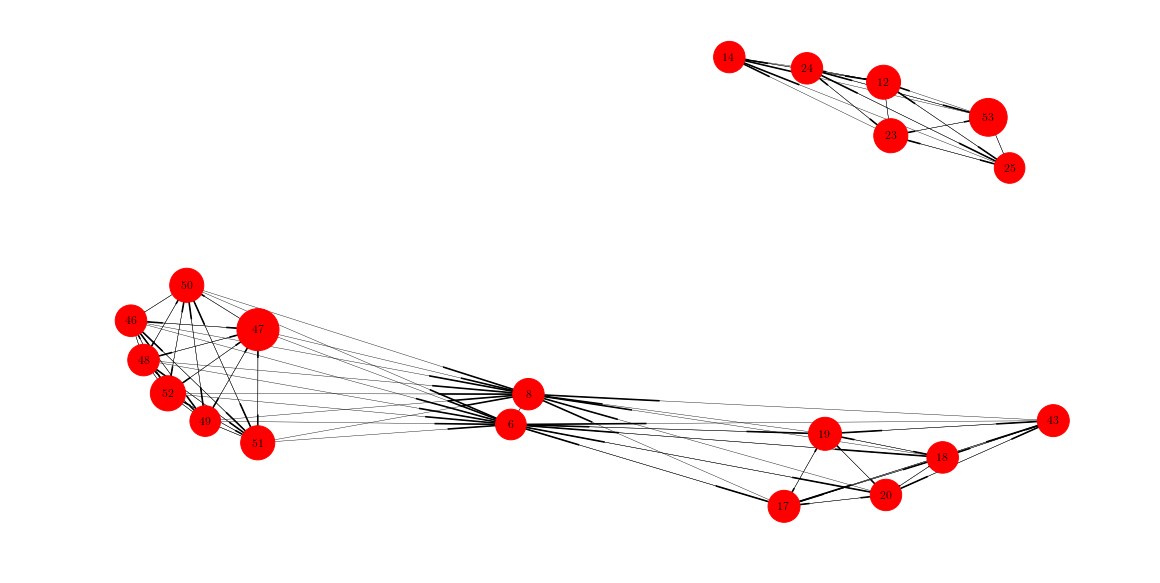

In [25]:
G = networkx.DiGraph()
G.add_edges_from(subgraph)
plt.figure(figsize=(20,10))
plt.axis('off')
networkx.draw_networkx(G, width=0.4, node_size=size_const * pr_distribution * 10)

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

In [26]:
pr_distribution

array([ 0.00938606,  0.00986141,  0.01021783,  0.00993085,  0.01089242,
        0.00986141,  0.01153192,  0.00986141,  0.01157822,  0.00987733,
        0.00934066,  0.01021783,  0.01425415,  0.00993085,  0.01766595,
        0.00993085,  0.00938606,  0.01161589,  0.01161589,  0.01233396,
        0.01233396,  0.00934066,  0.01144535,  0.0213205 ,  0.03008776,
        0.03395049,  0.01006113,  0.01019654,  0.00965592,  0.00993522,
        0.00993522,  0.00965592,  0.01117196,  0.00993085,  0.01080569,
        0.00993085,  0.01106578,  0.00993085,  0.01081246,  0.00993085,
        0.01108665,  0.00993085,  0.00934066,  0.01153192,  0.00986141,
        0.01144535,  0.01144535,  0.01144535,  0.01144535,  0.01144535,
        0.01144535,  0.01144535,  0.01144535,  0.01425415,  0.00973816,
        0.00973816,  0.01014337,  0.01001745,  0.00962205,  0.00973816,
        0.00973816,  0.00962205,  0.01008904,  0.01022445,  0.00968383,
        0.00996313,  0.01023712,  0.00968383,  0.00968383,  0.00

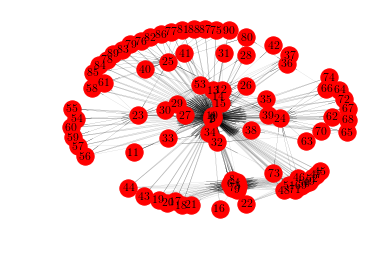

In [27]:
G = networkx.DiGraph()
G.add_edges_from(links)
plt.axis('off')
networkx.draw_networkx(G, width=0.05)

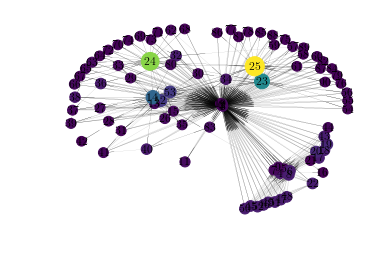

In [28]:
start_distribution = np.ones((1, NN)) / NN
pr_distribution, trace = page_rank(links, start_distribution, return_trace=True, tolerance=1)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.05, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

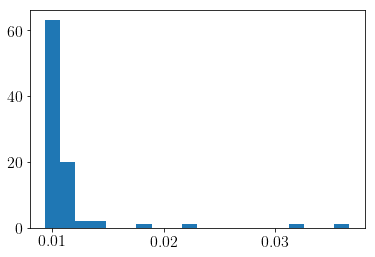

In [29]:
plt.hist(pr_distribution, bins=20)
plt.show()

In [30]:
n_top = 20
top_indexes = get_indexes_top_pages(pr_distribution, n_top)

In [31]:
_ = list(map(lambda pair: print("{0} : {1}".format(*pair)), zip(top_indexes, np.array(urls)[top_indexes])))

25 : https://yandexdataschool.ru/edu-process/program/special-courses
24 : https://yandexdataschool.ru/edu-process/program/big-data
23 : https://yandexdataschool.ru/edu-process/program/data-analysis
14 : https://yandexdataschool.ru/edu-process/courses
53 : https://yandexdataschool.ru/edu-process/program/computer-science
12 : https://yandexdataschool.ru/edu-process/program
20 : https://yandexdataschool.ru/about/branches/saint-petersburg
19 : https://yandexdataschool.ru/about/branches/novosibirsk
18 : https://yandexdataschool.ru/about/branches/nizhny_novgorod
17 : https://yandexdataschool.ru/about/branches/minsk
8 : https://yandexdataschool.ru/about/graduates
43 : https://yandexdataschool.ru/about/branches/yekaterinburg
6 : https://yandexdataschool.ru/about/branches
52 : https://yandexdataschool.ru/about/graduates/yearbook/2016
51 : https://yandexdataschool.ru/about/graduates/yearbook/2015
50 : https://yandexdataschool.ru/about/graduates/yearbook/2014
49 : https://yandexdataschool.ru/abou

In [32]:
subgraph = get_graph_with_chosen_pages(links, top_indexes)

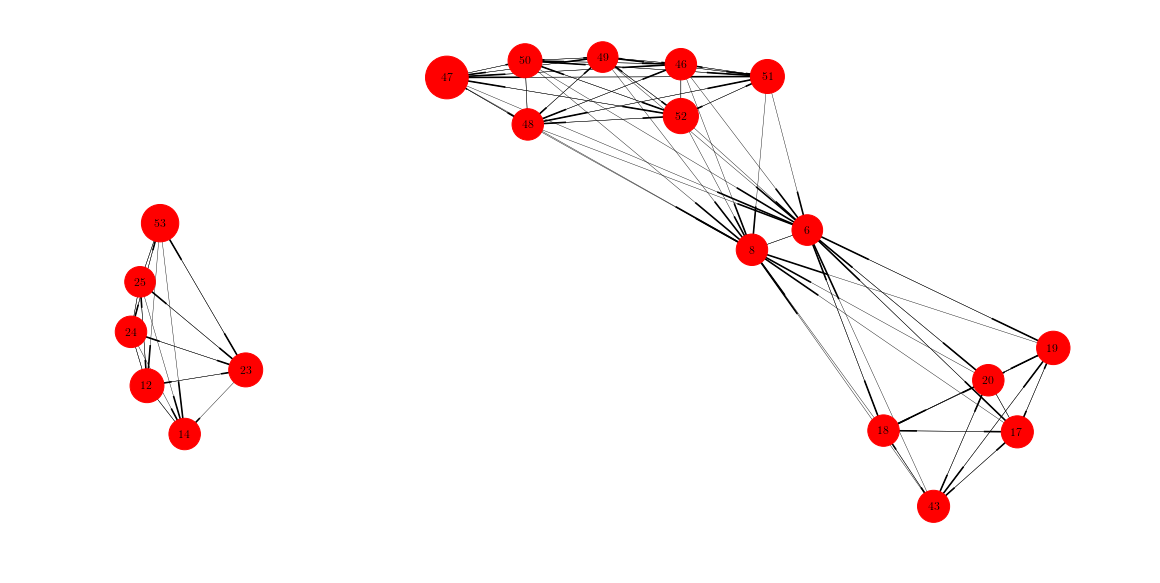

In [33]:
G = networkx.DiGraph()
G.add_edges_from(subgraph)
plt.figure(figsize=(20,10))
plt.axis('off')
networkx.draw_networkx(G, width=0.4, node_size=size_const * pr_distribution * 10)

In [34]:
pr_distribution

array([ 0.00939046,  0.00989089,  0.01028979,  0.00987665,  0.01114935,
        0.00989089,  0.0114843 ,  0.00989089,  0.01153924,  0.00990962,
        0.00934066,  0.01028979,  0.0139791 ,  0.00987665,  0.01825577,
        0.00987665,  0.00939046,  0.01156672,  0.01156672,  0.01239089,
        0.01239089,  0.00934066,  0.01141104,  0.02217324,  0.03178507,
        0.03669522,  0.0100236 ,  0.01016096,  0.00961151,  0.00988624,
        0.00988624,  0.00961151,  0.01130083,  0.00987665,  0.01088874,
        0.00987665,  0.01116347,  0.00987665,  0.01088874,  0.00987665,
        0.01116347,  0.00987665,  0.00934066,  0.0114843 ,  0.00989089,
        0.01141104,  0.01141104,  0.01141104,  0.01141104,  0.01141104,
        0.01141104,  0.01141104,  0.01141104,  0.0139791 ,  0.0095932 ,
        0.0095932 ,  0.01000528,  0.00986792,  0.0094943 ,  0.0095932 ,
        0.0095932 ,  0.0094943 ,  0.00993741,  0.01007477,  0.00952532,
        0.00980005,  0.01007477,  0.00952532,  0.00952532,  0.00

Понятия не имею какие выводы вы хотели здесь увидеть.

## Part 3 (50%)

Для выполнения этой части вам потребуется библиотека RankLib https://sourceforge.net/p/lemur/wiki/RankLib/

Скачайте датасет с конкурса «Интернет-математика 2009»
https://academy.yandex.ru/events/data_analysis/grant2009/

Разбейте его на три части train, test, valid размера 10% каждая.
Функции, реализующие это, возьмите с семинара.
Правда, привести файл к формату SVM-Rank (см. документацию по RankLib) придется самостоятельно.

In [35]:
def read_file(file_path, features_count):
    ''' Считывает дата-файл по адресу file_path, в котором есть не более features_count признаков.
    Возвращает список меток релевантности, id запросов и матрицу признаков'''
    
    relevs = []
    qids = []
    features = []
    
    with open(file_path) as data_file:
        for line in data_file:
            split_line = line.split(' ')
            
            # релевантность и id запроса
#             print(split_line)
            qids.append(split_line[-1].replace('\n', ''))
            relevs.append(float(split_line[0]))
#             relevs.append(split_line[0])
#             qids.append(int(split_line[1].split(':')[1]))
            
            # признаки
            object_features = np.zeros(features_count, dtype=float)
            for feat in split_line[2:-2]:
                index, value = map(float, feat.split(':'))
                object_features[int(index)] = value
            
            features.append(object_features)
    
    return relevs, qids, np.array(features)


def write(features, relevs, qids, file_path, index_begin, index_end):
    ''' Создает файл по адресу file_path, в который будут записаны релевантности relevs,
    номера запросов qids и признаки features с номера index_begin по index_end. '''
    
    with open(file_path, 'w') as f:
        for index_line in range(index_begin, index_end):
            f.write('{} qid:{}'.format(relevs[index_line], qids[index_line]))
            for i in range(features.shape[1]):
                f.write(' {}:{}'.format(i + 1, features[index_line, i]))
            f.write('\n')
            

def split_to_train_valid_test(relevs, qids, features, 
                              train_path, test_path,
                              train_size, test_size,
                              valid_path=None, valid_size=None):
    ''' Разбивает датасет на две или три части, и записывает их в файлы'''

    num_docs = len(qids)
    i_0 = 0
    
    qids = np.array(qids)
    is_new_query = qids[:-1] != qids[1:]  # True в тех позициях, в которых начинается новый запрос
    new_query_positions = np.arange(num_docs - 1)[is_new_query]  # Позиции, в которых начинается новый запрос

    # Ищем позицию, на которой заканчивается train
    allow_positions = new_query_positions > (train_size * num_docs)
    i_1 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

    # Ищем позицию, на которой заканчивается test
    allow_positions = new_query_positions > ((train_size + test_size) * num_docs)
    i_2 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

    write(features, relevs, qids, train_path, i_0, i_1)
    write(features, relevs, qids, test_path, i_1, i_2)

    if valid_path is not None:
        # Ищем позицию, на которой заканчивается valid
        allow_positions = new_query_positions > ((train_size + test_size + valid_size) * num_docs)
        i_3 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

        write(features, relevs, qids, valid_path, i_2, i_3)

In [36]:
def read_metric_dependence_from_file(file_name, num_lines, num_blocks=1):
    ''' Извлекает значения метрики в процессе обучения из log-файлов, 
    создаваемых библиотекой RankLib при обучении.
        file_name --- имя log-файла
        num_lines --- число строк, в которых записаны значения. 
                      Смысл --- количество выполненых итераций при обучении.
        num_blocks --- количество блоков значений. 
                       Смысл --- число k в случае k-fold CV
                       
        Возвращает лист из np.array в количестве num_blocks.
    Первый столбец каждого np.array --- номер итерации. Все следующие --- значения.
    '''
    
    with open(file_name) as f:
        text = f.readlines()
    
    values = []
    for block_id in range(num_blocks):
        index = text.index('Training starts...\n') + 4
        block_values = np.array(list(map(lambda x: list(map(float, x.split('|')[:-1])), 
                                         text[index:index + num_lines])))
        values.append(block_values)
        text = text[index:]
        
    return values

In [37]:
relevs, qids, features = read_file('./imat2009-datasets/imat2009_learning.txt', 250)

In [38]:
split_to_train_valid_test(relevs, qids, features, './imat2009-datasets/train.txt', 
                          './imat2009-datasets/test.txt', 0.01, 0.01, 
                          valid_path='./imat2009-datasets/valid.txt', valid_size=0.01)

Запустим LambdaMART (бустинг на деревьях, модель 6) на 100 деревьях с 5 листами в каждом. Будем использовать метрику  NDCG10
 . Сохраняем саму модель в ./model/LambdaMART_100_5.txt, а вывод обучения в ./model/log_LambdaMART_100_5.txt

In [39]:
%%time
! java -jar /Users/maxim/python_libs/lemur/trunk/bin/RankLib.jar -train ./imat2009-datasets/train.txt -test ./imat2009-datasets/test.txt -validate ./imat2009-datasets/valid.txt -ranker 6 -tree 100 -leaf 5 -metric2t NDCG@10 -save ./model/LambdaMART_100_5.txt > ./model/log_LambdaMART_100_5.txt

CPU times: user 41.1 ms, sys: 25.4 ms, total: 66.4 ms
Wall time: 2.46 s


Обучите на train методы MART и LambdaMART на 300 итераций, указав им метрику NDCG и передав так же valid.
Записывайте сюда команды аналогично тому, как это было сделано на семинаре.
Значения метрики в зависимости от номера итерации сохранились в log-файле.
Для считывания поможет приведенная ниже функция.

In [40]:
%%time
! java -jar /Users/maxim/python_libs/lemur/trunk/bin/RankLib.jar -train ./imat2009-datasets/train.txt -test ./imat2009-datasets/test.txt -validate ./imat2009-datasets/valid.txt  -estop 300 -ranker 6 -tree 300 -leaf 5 -metric2t NDCG@10 -save ./model/LambdaMART_300_5.txt > ./model/log_LambdaMART_300_5.txt

CPU times: user 53.2 ms, sys: 29.3 ms, total: 82.5 ms
Wall time: 3.21 s


In [41]:
%%time
! java -jar /Users/maxim/python_libs/lemur/trunk/bin/RankLib.jar -train ./imat2009-datasets/train.txt -test ./imat2009-datasets/test.txt -validate ./imat2009-datasets/valid.txt  -estop 300 -ranker 0 -tree 300 -leaf 5 -metric2t NDCG@10 -save ./model/MART_300_5.txt > ./model/log_MART_300_5.txt

CPU times: user 42.3 ms, sys: 26 ms, total: 68.3 ms
Wall time: 2.68 s


In [42]:
read_metric_dependence_from_file('./model/log_LambdaMART_300_5.txt', 300)

[array([[   1.    ,    0.6722,    0.5913],
        [   2.    ,    0.6817,    0.5921],
        [   3.    ,    0.6807,    0.5913],
        [   4.    ,    0.6807,    0.5913],
        [   5.    ,    0.6807,    0.5913],
        [   6.    ,    0.6862,    0.59  ],
        [   7.    ,    0.6864,    0.59  ],
        [   8.    ,    0.6916,    0.5907],
        [   9.    ,    0.6916,    0.5925],
        [  10.    ,    0.7053,    0.6088],
        [  11.    ,    0.7063,    0.6088],
        [  12.    ,    0.7278,    0.6146],
        [  13.    ,    0.7284,    0.6148],
        [  14.    ,    0.7285,    0.6141],
        [  15.    ,    0.731 ,    0.6137],
        [  16.    ,    0.7375,    0.6144],
        [  17.    ,    0.7347,    0.6141],
        [  18.    ,    0.739 ,    0.6195],
        [  19.    ,    0.7405,    0.6167],
        [  20.    ,    0.7458,    0.6195],
        [  21.    ,    0.756 ,    0.6252],
        [  22.    ,    0.7535,    0.6244],
        [  23.    ,    0.7641,    0.6147],
        [  

Постройте график значения метрики NDCG в зависимости от номера итерации на train и valid для ранее обученных моделей MART и LambdaMART.

In [43]:
values = (read_metric_dependence_from_file('./model/log_LambdaMART_300_5.txt', 300)[0],
          read_metric_dependence_from_file('./model/log_MART_300_5.txt', 300)[0])

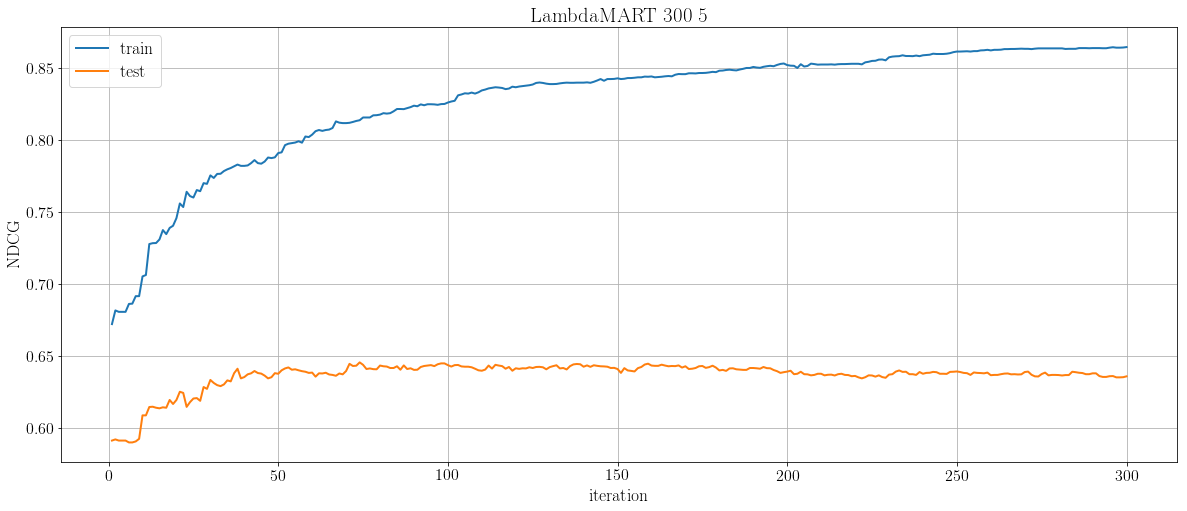

In [44]:
plt.figure(figsize=(20, 8))
plt.plot(values[0][:, 0], values[0][:, 1], lw=2, label='train')
plt.plot(values[0][:, 0], values[0][:, 2], lw=2, label='test')
plt.xlabel('iteration')
plt.ylabel('NDCG')
plt.title("LambdaMART 300 5")
plt.legend(loc=2)
plt.grid()
plt.show()

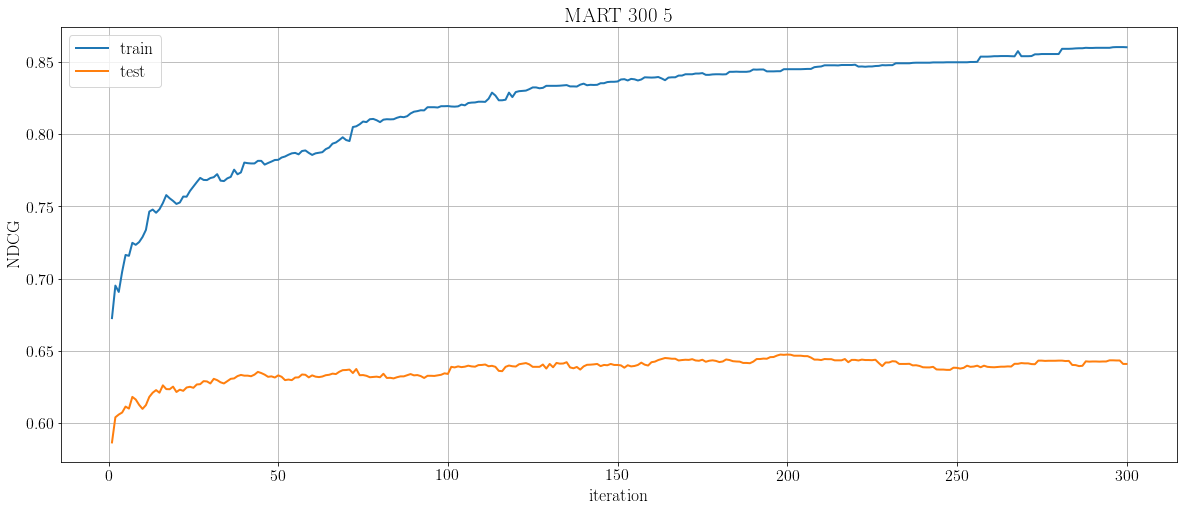

In [45]:
plt.figure(figsize=(20, 8))
plt.plot(values[1][:, 0], values[1][:, 1], lw=2, label='train')
plt.plot(values[1][:, 0], values[1][:, 2], lw=2, label='test')
plt.xlabel('iteration')
plt.ylabel('NDCG')
plt.title("MART 300 5")
plt.legend(loc=2)
plt.grid()
plt.show()

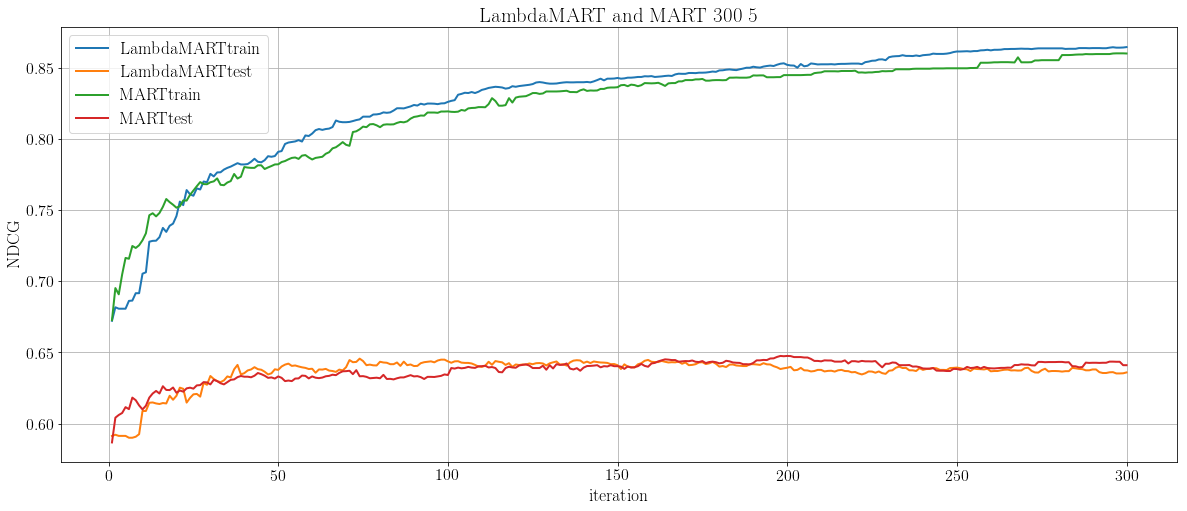

In [46]:
plt.figure(figsize=(20, 8))
plt.plot(values[0][:, 0], values[0][:, 1], lw=2, label='LambdaMARTtrain')
plt.plot(values[0][:, 0], values[0][:, 2], lw=2, label='LambdaMARTtest')
plt.plot(values[1][:, 0], values[1][:, 1], lw=2, label='MARTtrain')
plt.plot(values[1][:, 0], values[1][:, 2], lw=2, label='MARTtest')
plt.xlabel('iteration')
plt.ylabel('NDCG')
plt.title("LambdaMART and MART 300 5")
plt.legend(loc=2)
plt.grid()
plt.show()

Можно ли сказать, что какая-то модель работает лучше? Достигается ли точка переобучения?

Модели обучаются одинаково. По графику видно, что на train'е значение все время улучшается, в то время как на тесте примерно после 50 итерации значение просто колеблется, так что после этого момента модель переобучается.

Постройте аналогичные графики для Random Forests и RankNet (по отдельности).
Какие выводы можно сделать?

In [47]:
%%time
! java -jar /Users/maxim/python_libs/lemur/trunk/bin/RankLib.jar -train ./imat2009-datasets/train.txt -test ./imat2009-datasets/test.txt -validate ./imat2009-datasets/valid.txt  -estop 300 -ranker 1 -metric2t NDCG@10 -save ./model/RankNet_300_5.txt > ./model/log_RankNet_300_5.txt

CPU times: user 268 ms, sys: 98.6 ms, total: 366 ms
Wall time: 18.6 s


In [48]:
%%time
! java -jar /Users/maxim/python_libs/lemur/trunk/bin/RankLib.jar -train ./imat2009-datasets/train.txt -test ./imat2009-datasets/test.txt -validate ./imat2009-datasets/valid.txt -estop 300 -ranker 8 -tree 100 -leaf 5 -metric2t NDCG@10 -save ./model/Random_Forests_100_5.txt > ./model/log_Random_Forests_100_5.txt

CPU times: user 2.42 s, sys: 821 ms, total: 3.24 s
Wall time: 2min 24s


In [49]:
def read_metric_dependence_from_file_RF(file_name, num_lines, num_blocks=1):
    ''' Извлекает значения метрики в процессе обучения из log-файлов, 
    создаваемых библиотекой RankLib при обучении.
        file_name --- имя log-файла
        num_lines --- число строк, в которых записаны значения. 
                      Смысл --- количество выполненых итераций при обучении.
        num_blocks --- количество блоков значений. 
                       Смысл --- число k в случае k-fold CV
                       
        Возвращает лист из np.array в количестве num_blocks.
    Первый столбец каждого np.array --- номер итерации. Все следующие --- значения.
    '''
    
    with open(file_name) as f:
        text = f.readlines()
    
    values = []
    for block_id in range(num_blocks):
        index = text.index('Training starts...\n') + 4
        block_values = np.array(list(map(lambda x: [float(x.split('|')[0].strip()[2:-1])] + list(map(float, x.split('|')[1:-1])), 
                                         text[index:index + num_lines])))
        values.append(block_values)
        text = text[index:]
        
    return values

Постройте график значения метрики NDCG в зависимости от номера итерации на train и valid для ранее обученных моделей MART и LambdaMART.

In [54]:
values = (read_metric_dependence_from_file('./model/log_RankNet_300_5.txt', 100)[0],
          read_metric_dependence_from_file_RF('./model/log_Random_Forests_100_5.txt', 300)[0])

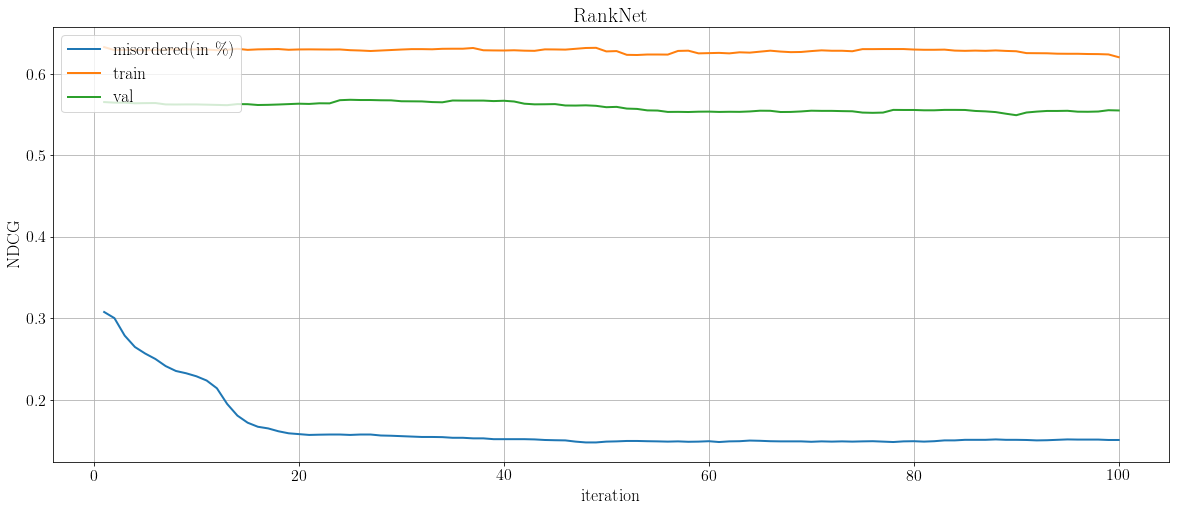

In [55]:
plt.figure(figsize=(20, 8))
plt.plot(values[0][:, 0], values[0][:, 1], lw=2, label='misordered(in \%)')
plt.plot(values[0][:, 0], values[0][:, 2], lw=2, label='train')
plt.plot(values[0][:, 0], values[0][:, 3], lw=2, label='val')
plt.xlabel('iteration')
plt.ylabel('NDCG')
plt.title("RankNet")
plt.legend(loc=2)
plt.grid()
plt.show()

Процент неправильно размеченных уменьшается, однако это приводит к переобучению.

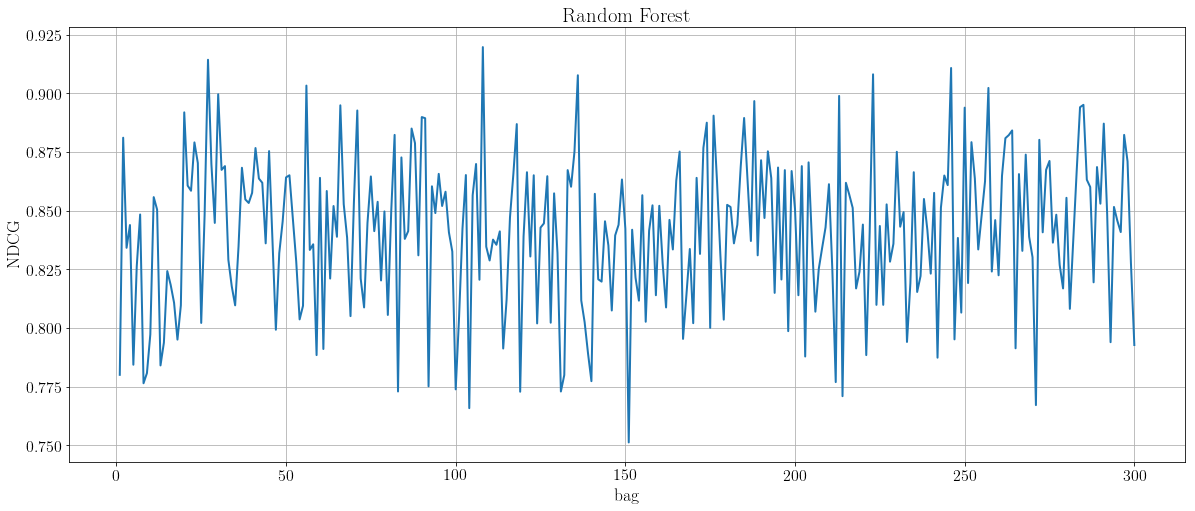

In [56]:
plt.figure(figsize=(20, 8))
plt.plot(values[1][:, 0], values[1][:, 1], lw=2)
plt.xlabel('bag')
plt.ylabel('NDCG')
plt.title("Random Forest")
# plt.legend(loc=2)
plt.grid()
plt.show()

Обучение Random Forest'а на 100 деревьях с максимальной глубиной 5 показывает в среднем лучший результат среди всех рассмотренных моделей NDCG@10~0.85

#### Сглаживание дискретных метрик

Одна из основных проблем в обучении ранжированию --- дискретность метрик.
Мы знаем, как решается эта проблема в LambdaRank и LambdaMART (см. вопрос выше).
Однако, в некоторых задачах нужно использовать саму метрику.
В связи с этим возникают задачи разработки сглаженных версий дискретных метрик.
Рассмотрим самый простой из них.

Пусть $X_{train}$ --- обучающая выборка. Разобьем ее на две части независимо $M$ раз: $X_{train} = X_1^m \sqcup X_2^m$, причем разбиение будем производить *по запросам*, то есть пары $(q, d_1)$ и $(q, d_2)$ попадают в одну из этих двух частей. Далее обучаем наш метод на $X_1^m$ и применяем к $X_{test}$ --- тестовая выборка. Так мы получим $M$ чисел $Z_1, ..., Z_M$, каждое из которых есть значение метрики. Их усреднение дает сглаженное значение метрики.

Почему такой способ является нечестным? Как нужно было бы действовать честно?

<Ответ>

Теперь вам предстоит построить график сглаженной метрики $NDCG_{10}$ для LambdaMART c 300 деревьями и $M=10$.
Алгоритм примерно следующий:

на каждой итерации
* перемешать $X_{train}$ по запросам. Для этого есть специальная команда, см. описание библиотеки.
* разбить $X_{train}$ на две части. Для этого есть функция с семинара.
* обучить LambdaMART на первой части на 300 деревьях. Валидационную выборку передавать не нужно.
* посчитать значение NDCG на $X_{test}$ по полученной модели в зависимости от количества деревьев.

В последнем пункте имеется ввиду следующее. 
Пусть модель представляется в виде $F(x) = \sum\limits_{t=1}^T \alpha_t f_t(x)$.
Нужно посчитать значение метрики по всем моделям $F(x) = \sum\limits_{t=1}^K \alpha_t f_t(x), K=1, ..., T$.

Для реализации вам потребуется самостоятельно создать файл с такой моделью на основе файла с обученной моделью, который представляет из себя список деревьев с некоторой дополнительной информацией.
Вам нужно в свой файл последовательно добавлять деревья по одному, а затем использовать команду для подсчета значения метрики на тестовой выборке по этой модели, см. описание библиотеки.

Выполнив эти операции, постройте график сглаженной метрики. Сравните с графиком исходной метрики.

In [57]:
from collections import defaultdict
from random import shuffle

In [58]:
def shuffle_query_lines(relevs, qids, features):
    ''' Перемешивает датасет блоками с одинаковым id запросов'''
    mapped_lines = defaultdict(list)
    list(map(lambda triplet: mapped_lines[triplet[0]].append((triplet[1], triplet[2])), zip(qids, relevs, features)))
    qids_values = list(mapped_lines.keys())
    shuffle(qids_values)
    shuffled_qids, shuffled_relevs, shuffled_features = [], [], []
    list(map(lambda qid: list(
        map(lambda pair: (
            shuffled_qids.append(int(qid)),
            shuffled_relevs.append(float(pair[0])),
            shuffled_features.append(pair[1])
        ), mapped_lines[qid])
    ), qids_values))
    return np.array(shuffled_relevs), np.array(shuffled_qids), np.array(shuffled_features)

In [59]:
def read_and_write_trees_from_ensemble(input_file_name, output_file_name, n_trees):
    with open(input_file_name) as f:
        text = f.readlines()
    
    find_trees = 0
    index = 0
    for i, line in enumerate(text):
        if line.strip() == '</tree>':
            find_trees += 1
            if find_trees == n_trees:
                index = i + 1
                break
    if find_trees != n_trees:
        raise ValueError('Input file does not have enough trees')
        
    with open(output_file_name, 'w') as f:
        f.writelines(text[:index] + ['</ensemble>\n'])

In [61]:
%%time
M = 10
metrics = []
for i in tqdm(range(M)):
    shuffled_relevs, shuffled_qids, shuffled_features = shuffle_query_lines(relevs, qids, features)
    split_to_train_valid_test(
        shuffled_relevs, shuffled_qids, shuffled_features, 
        './imat2009-datasets/smooth/train.txt', './imat2009-datasets/smooth/test.txt', 0.01, 0.01
    )
    ! java -jar /Users/maxim/python_libs/lemur/trunk/bin/RankLib.jar -train ./imat2009-datasets/smooth/train.txt -test ./imat2009-datasets/smooth/test.txt -estop 300 -ranker 6 -tree 300 -leaf 5 -metric2t NDCG@10 -save ./model/LambdaMART/LambdaMART.txt > ./model/LambdaMART/log_LambdaMART.txt
    cur_metrics = []
    for n_trees in tqdm(range(1, 300)):
        input_file_name = './model/LambdaMART/LambdaMART.txt'
        output_file_name = './model/LambdaMART/LambdaMART_temp.txt'
        read_and_write_trees_from_ensemble(input_file_name, output_file_name, n_trees)
        ! java -jar /Users/maxim/python_libs/lemur/trunk/bin/RankLib.jar -load ./model/LambdaMART/LambdaMART_temp.txt -test ./imat2009-datasets/smooth/test.txt -metric2T NDCG@10 > ./model/LambdaMART/metric.txt
        with open('./model/LambdaMART/metric.txt') as f:
            read_metric = f.read().strip()
            cur_metrics.append(float(read_metric.split()[-1]))
    metrics.append(cur_metrics)

 52%|█████▏    | 155/299 [01:41<01:45,  1.37it/s]


  3%|▎         | 9/299 [00:05<02:45,  1.76it/s]


 55%|█████▌    | 165/299 [01:45<01:38,  1.36it/s]


  6%|▋         | 19/299 [00:10<02:38,  1.76it/s]


 59%|█████▊    | 175/299 [01:52<01:27,  1.41it/s]


 10%|▉         | 29/299 [00:16<02:35,  1.73it/s]


 62%|██████▏   | 184/299 [01:59<01:25,  1.35it/s]


 13%|█▎        | 38/299 [00:22<02:35,  1.67it/s]


 65%|██████▍   | 193/299 [02:05<01:20,  1.31it/s]


 16%|█▌        | 47/299 [00:26<02:22,  1.77it/s]


 68%|██████▊   | 202/299 [02:05<01:07,  1.44it/s]


 19%|█▉        | 57/299 [00:33<02:27,  1.64it/s]


 71%|███████   | 212/299 [02:19<01:04,  1.35it/s]


 22%|██▏       | 67/299 [00:38<02:21,  1.64it/s]


 74%|███████▍  | 222/299 [02:25<00:57,  1.33it/s]


 26%|██▌       | 77/299 [00:45<02:17,  1.62it/s]


 78%|███████▊  | 232/299 [02:33<00:49,  1.35it/s]


 29%|██▉       | 87/299 [00:52<02:12,  1.60it/s]


 81%|████████  | 241/299 [02:40<00:43,  1.34it/s]


100%|██████████| 10/10 [34:51<00:00, 208.02s/it]

CPU times: user 1min 3s, sys: 32.1 s, total: 1min 35s
Wall time: 34min 51s


In [62]:
np.array(metrics).shape

(10, 299)

In [63]:
for_graph_metrics = [np.mean(np.array([metrics[i][n_trees] for i in range(M)])) for n_trees in range(0, 299)]

In [64]:
len(for_graph_metrics)

299

График сглаженной метрики

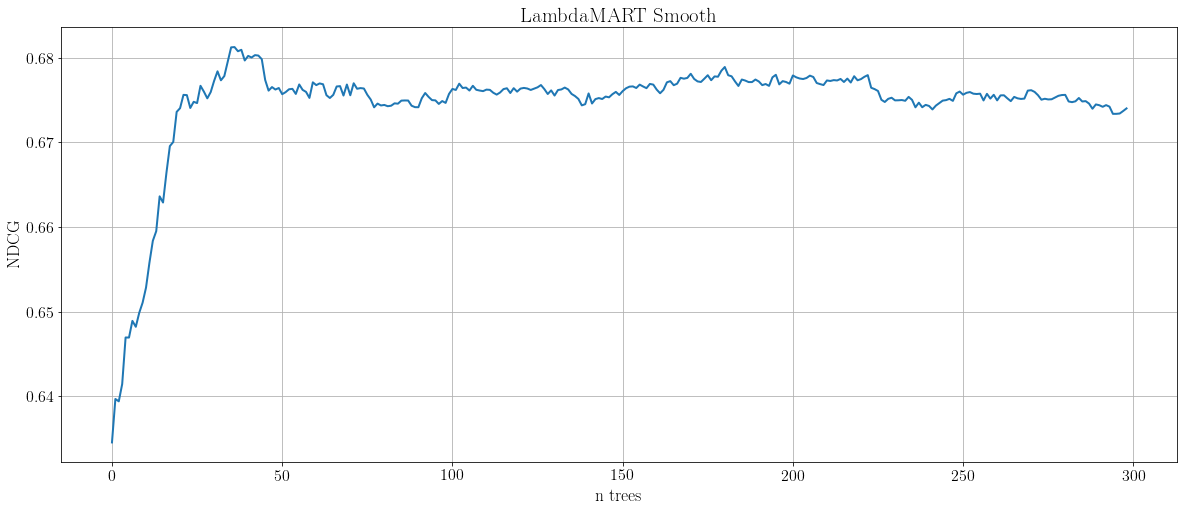

In [65]:
plt.figure(figsize=(20, 8))
plt.plot(list(range(0, 299)), for_graph_metrics, lw=2)
plt.xlabel('n trees')
plt.ylabel('NDCG')
plt.title("LambdaMART Smooth")
# plt.legend(loc=2)
plt.grid()
plt.show()

Исходный график

In [66]:
values = (read_metric_dependence_from_file('./model/log_LambdaMART_300_5.txt', 300)[0],
          read_metric_dependence_from_file('./model/log_MART_300_5.txt', 300)[0])

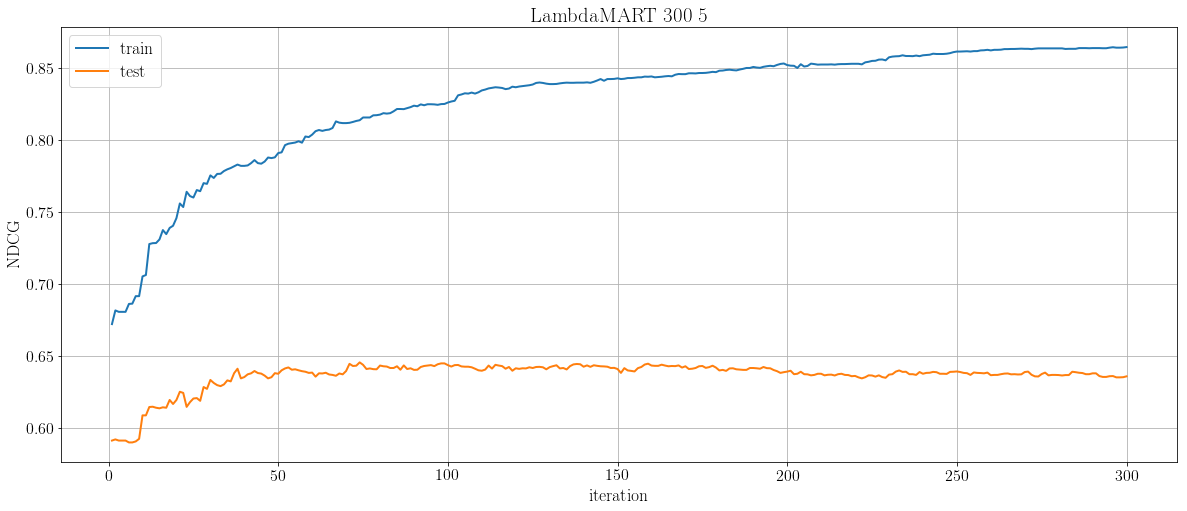

In [67]:
plt.figure(figsize=(20, 8))
plt.plot(values[0][:, 0], values[0][:, 1], lw=2, label='train')
plt.plot(values[0][:, 0], values[0][:, 2], lw=2, label='test')
plt.xlabel('iteration')
plt.ylabel('NDCG')
plt.title("LambdaMART 300 5")
plt.legend(loc=2)
plt.grid()
plt.show()

Вместе

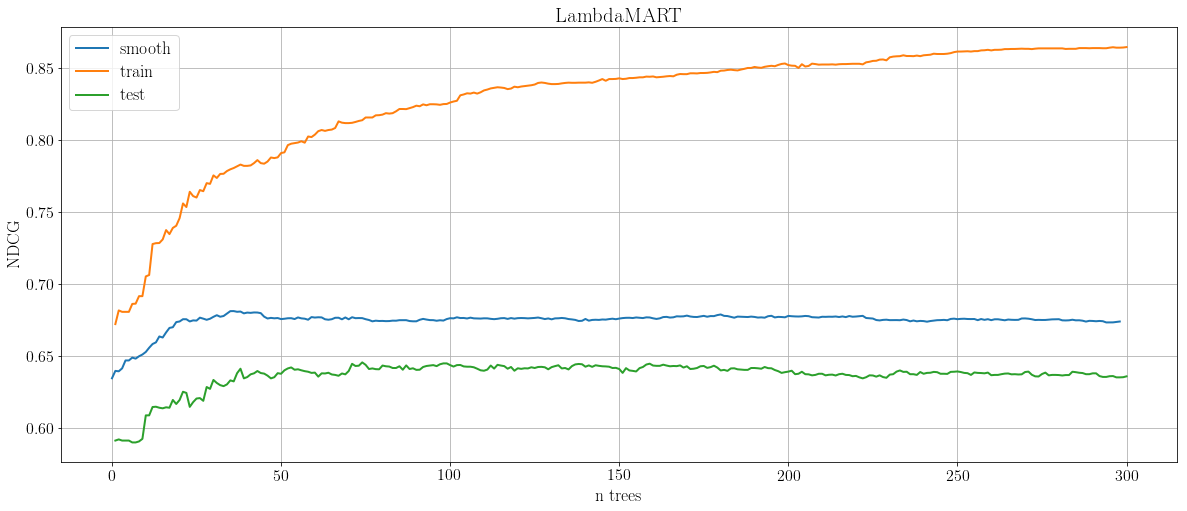

In [68]:
plt.figure(figsize=(20, 8))
plt.plot(list(range(0, 299)), for_graph_metrics, lw=2, label='smooth')
plt.plot(values[0][:, 0], values[0][:, 1], lw=2, label='train')
plt.plot(values[0][:, 0], values[0][:, 2], lw=2, label='test')
plt.xlabel('n trees')
plt.ylabel('NDCG')
plt.title("LambdaMART")
plt.legend(loc=2)
plt.grid()
plt.show()

Сглаженные значения метрики стабильно лучше показателей на тесте в момент построения.